# Introduction

In the past week or so, the wildfires in LA had devastating effects on many families. These impacts, unfortunately, is distributed unequally across the affected neighborhoods (See [brief](https://latino.ucla.edu/research/wildfires-and-latino-communities-health-economic-and-preparedness-challenges/) from the UCLA Latino Policy & Politics Institute and UCLA Center for Neighborhood Knowledge).

For this data exploration assignment, my goal is to familiarize myself on the housing indicators of the American Community Survey (ACS) and CalEnviroScreen 4.0. My hope is to practice my skills in merging dataset in Python and querying the data that I only need. I note that I **do not intend** to isolate the neighborhoods affected by the wildfires; but, my goal is to get a sense of the "housing" variables that may be relevant for further analysis our group may eventually do regarding the impacts of wildfires.

I am going to be using the recent, 5-year ACS estimates from 2015-2019 to extract the count of households who are renters at the tract-level. Further, I will also use the CalEnviroScreen 4.0 indicators. All of the data came from the sources, Social Explorer and the Office of Environmental Health Hazard Assessment-CA.

In [2]:
# importing necessary packages or libraries

import pandas as pd
import geopandas as gpd

# ACS Dataset

In [3]:
# importing the ACS data from the cloned repo from week 1

acs = pd.read_csv('/home/jovyan/UP221-bryzen/data/acs_15_19/acs_15_19.csv')

In [4]:
# diagnosing the dataset's number of rows and columns

acs.shape

(8057, 63)

In [5]:
# diagnosing the dataset's variables and their type

acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geo_FIPS              8057 non-null   int64  
 1   Geo_NAME              8057 non-null   object 
 2   Geo_QName             8057 non-null   object 
 3   Geo_STUSAB            8057 non-null   object 
 4   Geo_SUMLEV            8057 non-null   int64  
 5   Geo_GEOCOMP           8057 non-null   int64  
 6   Geo_FILEID            8057 non-null   object 
 7   Geo_LOGRECNO          8057 non-null   int64  
 8   Geo_US                0 non-null      float64
 9   Geo_REGION            0 non-null      float64
 10  Geo_DIVISION          0 non-null      float64
 11  Geo_STATECE           0 non-null      float64
 12  Geo_STATE             8057 non-null   int64  
 13  Geo_COUNTY            8057 non-null   int64  
 14  Geo_COUSUB            0 non-null      float64
 15  Geo_PLACE            

There are 8057 rows and 63 columns in the dataset we exported. This tells us that there are about 8057 tracts that are in the dataset and 63 different variables.

As we can also see, there were **too many variables** that I exported from social explorer. Using the data dictionary, we can see that the variable of interest is named "B25003003" or renter occupied. However, based on the acs.info() output, the variable name is 'ACS23_5yr_B25003003'. For now, I am going to select this variable and two tract identifier variables, "Geo_NAME" and "Geo_FIPS."

In [6]:
# selecting the necessary columns

selected_columns = acs[["ACS19_5yr_B25003003", "Geo_NAME", "Geo_FIPS"]]

In [7]:
# renaming the columns

selected_columns.columns = ['Renter Occupied Counts', 'Census Tract #', 'FIPS']

In [8]:
# checking if successfully selected and renamed variables of interest

selected_columns

,Renter Occupied Counts,Census Tract #,FIPS
0,143,Census Tract 4001,6001400100
1,322,Census Tract 4002,6001400200
2,1427,Census Tract 4003,6001400300
3,1064,Census Tract 4004,6001400400
4,968,Census Tract 4005,6001400500
...,...,...,...
8052,517,Census Tract 408,6115040800
8053,268,Census Tract 409.01,6115040901
8054,341,Census Tract 409.02,6115040902
8055,544,Census Tract 410,6115041000


# CalEnviroScreen 4.0 Dataset

In [9]:
# importing data from CalEnviroScreen

environment = pd.read_excel('/home/jovyan/UP221-bryzen/data/environment.xlsx')

In [10]:
# diagnosing the shape of the excel file

environment.shape

(8035, 58)

I found that there's 8035 rows and 58 columns, which indicates that there are 8035 tracts and 58 different variables in the CalEnviroScreen 4.0 data. This also tells us that there are some discrepancy between the two datasets: the ACS and CalEnviroScreen data. I suspect that this may be because of incomplete/missing data in some of the Census Tracts. What this tell us, however, is we have to proceed with caution with any type of analysis that we are going to do.

In [11]:
# showing the first few observations of the data

environment.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571


We see that there are too many variables in the dataset. Just like what we did for the ACs dataset, we are going to filter some of the variables, before we merge it with the ACS dataset. To meet the objectives of this data exploration, we will isolate the housing burden measure and the Census Tract and the California County as a geographic identifier.

In [12]:
# filtering the housing burden measure and the two geographic identifiers

environment = environment[["Census Tract", "California County", "Housing Burden"]]

# ACS and CalEnviroScreen 4.0 Datasets (Merged)

In [13]:
# merging the ACS using the geographic identifier, FIPS and Census Tract from the dataset

housing_burden = pd.concat([selected_columns, environment], axis = 1)

#a few comments:
#we use the axis=1 argument to tell the dataset to be merged horizontally.

In [14]:
# getting the number of columns and rows in the merged dataset, housing_burden

housing_burden.shape

(8057, 6)

In [15]:
# checking the first few observations to check that only the necessary variables are present

housing_burden.head()

,Renter Occupied Counts,Census Tract #,FIPS,Census Tract,California County,Housing Burden
0,143,Census Tract 4001,6001400100,6.019001e+09,Fresno,30.3
1,322,Census Tract 4002,6001400200,6.077001e+09,San Joaquin,31.2
2,1427,Census Tract 4003,6001400300,6.037205e+09,Los Angeles,20.3
3,1064,Census Tract 4004,6001400400,6.019001e+09,Fresno,35.4
4,968,Census Tract 4005,6001400500,6.019000e+09,Fresno,32.7


In [16]:
# ensuring that all the variables has appropriate types

housing_burden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Renter Occupied Counts  8057 non-null   int64  
 1   Census Tract #          8057 non-null   object 
 2   FIPS                    8057 non-null   int64  
 3   Census Tract            8035 non-null   float64
 4   California County       8035 non-null   object 
 5   Housing Burden          7890 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 377.8+ KB


Great! Now, we have a working dataset. Let's see how many tracts are there for each county. Ultimately, we want to find out the housing burden variable and counts of renter occupied units in Los Angeles city.

In [17]:
housing_burden['California County'].value_counts()

California County
Los Angeles        2343
San Diego           627
Orange              582
Riverside           453
Santa Clara         372
San Bernardino      369
Alameda             360
Sacramento          317
Contra Costa        207
Fresno              199
San Francisco       195
Ventura             173
San Mateo           157
Kern                151
San Joaquin         139
Sonoma               99
Solano               96
Stanislaus           94
Monterey             93
Santa Barbara        89
Placer               84
Tulare               78
Marin                55
San Luis Obispo      53
Santa Cruz           52
Butte                51
Merced               49
Shasta               48
El Dorado            42
Yolo                 41
Napa                 40
Imperial             31
Humboldt             30
Kings                27
Madera               23
Sutter               21
Mendocino            20
Nevada               20
Lake                 15
Yuba                 14
Siskiyou             1

Interestingly, the pd.value_counts() function chronologically puts the frequency of tracts per each county in descending order already. As we can see, there are 2343 tracts in Los Angeles county from this merged dataset. Now, let's make a data visualization of renter occupied units and housing burden in Los Angeles County.

In [18]:
# querying the data by only including the tracts in Los Angeles county

LA_housing_burden = housing_burden.loc[housing_burden['California County'] == 'Los Angeles']
LA_housing_burden

,Renter Occupied Counts,Census Tract #,FIPS,Census Tract,California County,Housing Burden
2,1427,Census Tract 4003,6001400300,6.037205e+09,Los Angeles,20.3
5,388,Census Tract 4006,6001400600,6.037542e+09,Los Angeles,23.7
7,984,Census Tract 4008,6001400800,6.037543e+09,Los Angeles,29.6
10,1652,Census Tract 4011,6001401100,6.037203e+09,Los Angeles,28.3
11,755,Census Tract 4012,6001401200,6.037291e+09,Los Angeles,26.1
...,...,...,...,...,...,...
7986,288,Census Tract 82.02,6111008202,6.037980e+09,Los Angeles,NaN
7987,628,Census Tract 83.02,6111008302,6.037980e+09,Los Angeles,NaN
7988,638,Census Tract 83.03,6111008303,6.037980e+09,Los Angeles,NaN
7989,476,Census Tract 83.04,6111008304,6.037980e+09,Los Angeles,NaN


<Axes: ylabel='Frequency'>

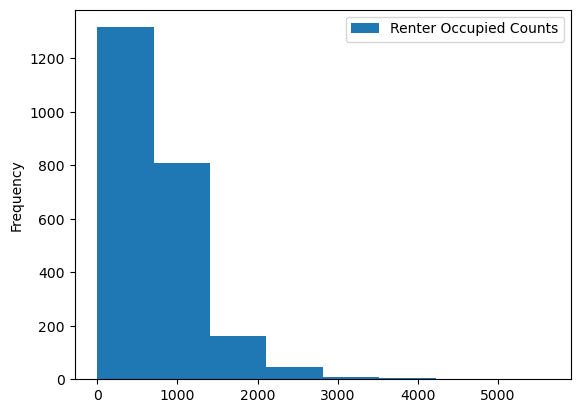

In [19]:
# plotting the renter occupied counts of census tracts across LA county using histogram

LA_housing_burden.plot.hist(column = 'Renter Occupied Counts', bins = 8)

We see that the distribution of renter occupied units of tracts in LA county is skewed to the right, where the median, as a measure of central tendency, is around 0-500 households.

<Axes: >

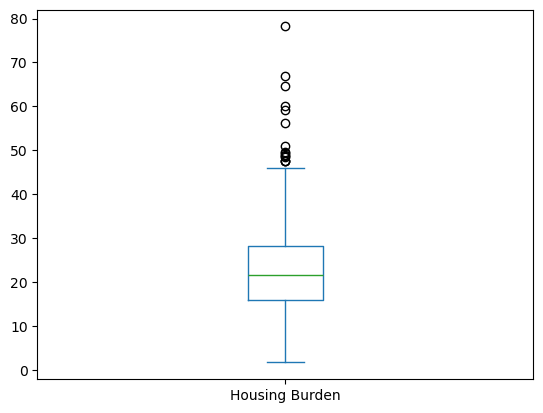

In [20]:
# plotting the housing burden using a boxplot

LA_housing_burden.plot.box(column = 'Housing Burden')

We see that the distribution of the housing burden index is skewed to the right with many outliers to the right side of the distribution. We also see that the median housing burden is around 20, with an interquartile range (IQR) of about 15.